# Modelo DNN

In [1]:
import time, numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import os, random
# MLP TABULAR EN KERAS (con grid manual y métricas)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
SEED = 42
# Carga dataset desde la carpeta raíz generada por TINTOlib
ruta_carpeta_actual = os.getcwd()
ruta_carpeta_raiz = os.path.dirname(ruta_carpeta_actual)
csv_path  = os.path.join(ruta_carpeta_raiz, "dataset", "PuntosMuestra_CR_2023.csv")
df = pd.read_csv(csv_path)

## Limpieza

In [3]:
# Quitar valores de la CATEGORIA = 2
df_filtrado = df[df["CATEGORIA"] != 2].copy()

# Re-mapear las clases a valores consecutivos desde 0
clases_unicas = sorted(df_filtrado["CATEGORIA"].unique())
mapa = {old: new for new, old in enumerate(clases_unicas)}
df_filtrado["CATEGORIA"] = df_filtrado["CATEGORIA"].map(mapa)

y = df_filtrado["CATEGORIA"]
X = df_filtrado.drop(columns=["CATEGORIA","lon","lat","year"])


## Data de entrenamiento y prueba

In [4]:
# 1) Split en train 80% / val 10% / test 10% (estratificado)
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=42
)

# 2) Escalado con ajustes SOLO en train
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train).astype("float32")
X_val = scaler.transform(X_val).astype("float32")
X_test= scaler.transform(X_test).astype("float32")

num_features = X_train.shape[1]
num_classes  = np.unique(y_train).size

## Definir modelo entrenamiento

In [5]:
def build_mlp(h1=64, h2=32, dropout=0.0, lr=1e-3, wd=0.0):
    inputs = keras.Input(shape=(num_features,))
    x = layers.Dense(h1, activation="relu", kernel_regularizer=keras.regularizers.l2(wd))(inputs)
    if dropout: x = layers.Dropout(dropout)(x)
    x = layers.Dense(h2, activation="relu", kernel_regularizer=keras.regularizers.l2(wd))(x)
    if dropout: x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
    )
    return model

early_stopper = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, restore_best_weights=True)


## Entrenamiento y testeo

MLP Grich 1: h1=64, h2=32, dropout=0.0, lr=0.001, wd=0.0


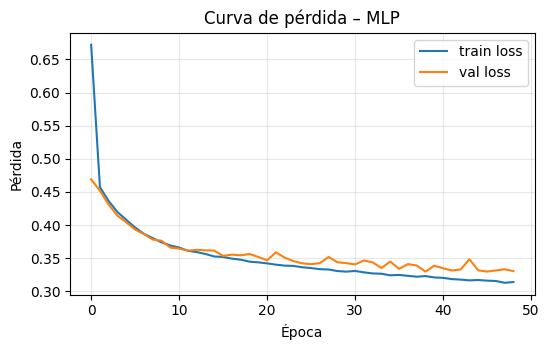

OA:0.8894 | Prec(macro):0.8382 | Recall(macro):0.8063 | F1-macro:0.8209 | val_loss:0.3307 | val_acc:0.8918
⏱ Train:15.39s | Test:0.121s (0.04 ms/muestra)

Reporte por clase:
               precision    recall  f1-score   support

           0     0.9049    0.9292    0.9169       819
           1     0.9214    0.9317    0.9265      1523
           2     0.9905    0.9286    0.9585       112
           3     0.7949    0.7881    0.7915       118
           4     0.7589    0.6204    0.6827       137
           5     0.6585    0.6398    0.6490       211

    accuracy                         0.8894      2920
   macro avg     0.8382    0.8063    0.8209      2920
weighted avg     0.8877    0.8894    0.8881      2920



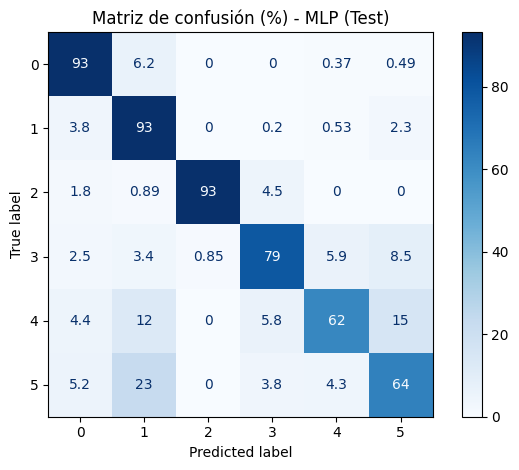

--------------------------------------------------------------------------------
MLP Grich 2: h1=64, h2=64, dropout=0.0, lr=0.001, wd=0.0


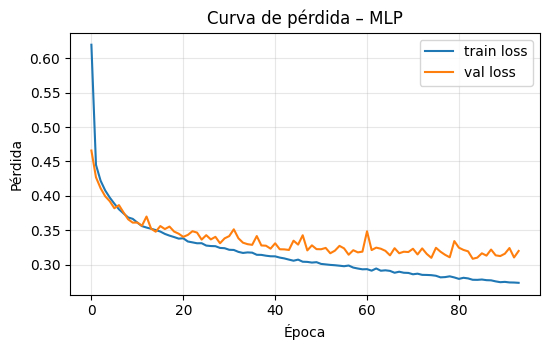

OA:0.8959 | Prec(macro):0.8455 | Recall(macro):0.8224 | F1-macro:0.8324 | val_loss:0.3201 | val_acc:0.8959
⏱ Train:28.90s | Test:0.088s (0.03 ms/muestra)

Reporte por clase:
               precision    recall  f1-score   support

           0     0.8998    0.9426    0.9207       819
           1     0.9286    0.9311    0.9298      1523
           2     0.9720    0.9286    0.9498       112
           3     0.8125    0.7712    0.7913       118
           4     0.7172    0.7591    0.7376       137
           5     0.7427    0.6019    0.6649       211

    accuracy                         0.8959      2920
   macro avg     0.8455    0.8224    0.8324      2920
weighted avg     0.8941    0.8959    0.8943      2920



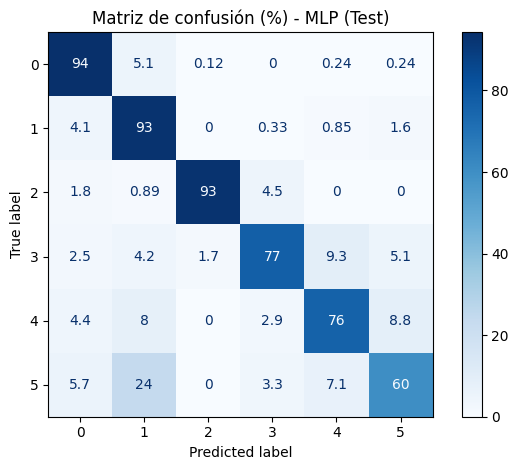

--------------------------------------------------------------------------------
MLP Grich 3: h1=128, h2=32, dropout=0.0, lr=0.001, wd=0.0


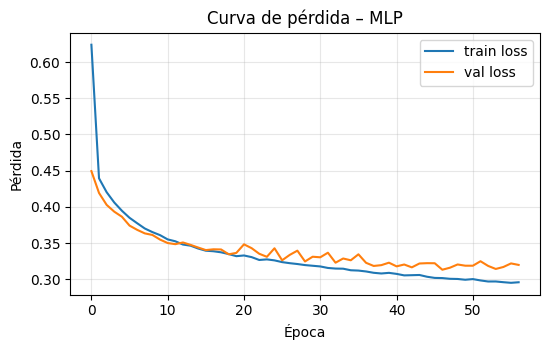

OA:0.8932 | Prec(macro):0.8499 | Recall(macro):0.8121 | F1-macro:0.8294 | val_loss:0.3200 | val_acc:0.8949
⏱ Train:17.98s | Test:0.089s (0.03 ms/muestra)

Reporte por clase:
               precision    recall  f1-score   support

           0     0.8987    0.9426    0.9201       819
           1     0.9290    0.9284    0.9287      1523
           2     0.9813    0.9375    0.9589       112
           3     0.8713    0.7458    0.8037       118
           4     0.7712    0.6642    0.7137       137
           5     0.6479    0.6540    0.6509       211

    accuracy                         0.8932      2920
   macro avg     0.8499    0.8121    0.8294      2920
weighted avg     0.8925    0.8932    0.8923      2920



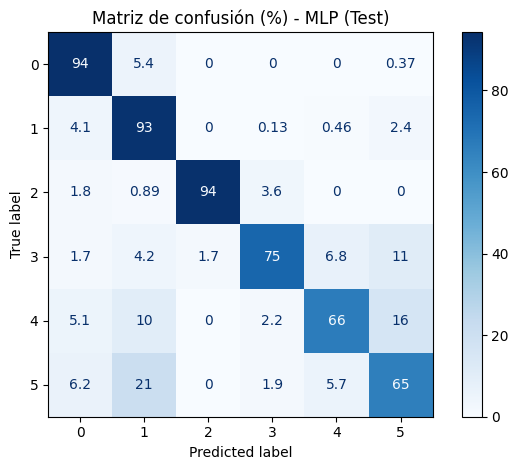

--------------------------------------------------------------------------------
MLP Grich 4: h1=128, h2=64, dropout=0.0, lr=0.001, wd=0.0


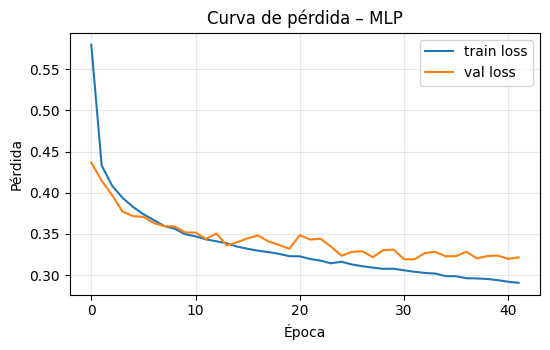

OA:0.8962 | Prec(macro):0.8628 | Recall(macro):0.8084 | F1-macro:0.8313 | val_loss:0.3216 | val_acc:0.8952
⏱ Train:13.65s | Test:0.088s (0.03 ms/muestra)

Reporte por clase:
               precision    recall  f1-score   support

           0     0.9106    0.9328    0.9216       819
           1     0.9105    0.9481    0.9289      1523
           2     0.9813    0.9375    0.9589       112
           3     0.8033    0.8305    0.8167       118
           4     0.8381    0.6423    0.7273       137
           5     0.7329    0.5592    0.6344       211

    accuracy                         0.8962      2920
   macro avg     0.8628    0.8084    0.8313      2920
weighted avg     0.8927    0.8962    0.8927      2920



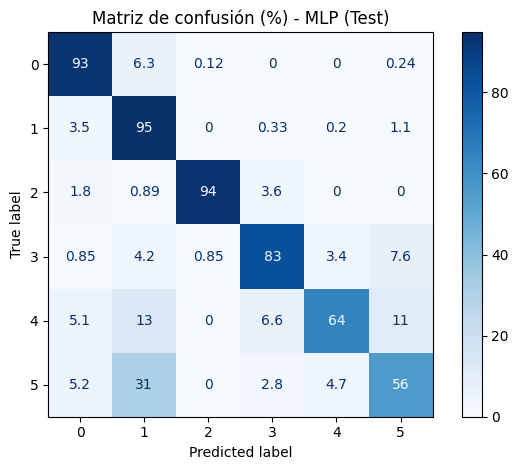

--------------------------------------------------------------------------------


In [6]:
import itertools

h1 = [64, 128]
h2 = [32, 64]
dropout = [0.0]
lr = [1e-3]
wd = [0.0] 

num = 0
for h1, h2, dropout, lr, wd in itertools.product(
        h1, h2, dropout, lr, wd):
    num = num + 1
    print(f"MLP Grich {num}: h1={h1}, h2={h2}, dropout={dropout}, lr={lr}, wd={wd}")
    
    # 3) Modelo
    #model = build_mlp(h1=64, h2=32, dropout=0.0, lr=1e-3, wd=0.0)
    model = build_mlp(h1=h1, h2=h2, dropout=dropout, lr=lr, wd=wd)
    EPOCH = 100

    # Early stopping por validación
    early_stopper = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True
    )

    # 4) Entrenamiento con validación (NO se toca test aquí)
    t0 = time.perf_counter()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCH,
        batch_size=64,
        shuffle=True,
        verbose=0,
        callbacks=[early_stopper]
    )
    fit_s = time.perf_counter() - t0

    # 5) Curvas de pérdida (train y val)
    plt.figure(figsize=(5.6,3.6))
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="val loss")
    plt.xlabel("Época"); plt.ylabel("Pérdida")
    plt.title("Curva de pérdida – MLP")
    plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

    # 6) Evaluación FINAL en TEST (una sola vez)
    t0 = time.perf_counter()
    y_pred = model.predict(X_test, batch_size=128, verbose=0).argmax(axis=1)
    pred_s = time.perf_counter() - t0
    ms_per_sample = (pred_s/len(y_test))*1000

    oa = accuracy_score(y_test, y_pred)
    prec, rec, f1m, _ = precision_recall_fscore_support(
        y_test, y_pred, average="macro", zero_division=0
    )
    cm  = confusion_matrix(y_test, y_pred)
    cm_row_pct = np.nan_to_num(cm.astype(float) / cm.sum(axis=1, keepdims=True) * 100)

    print(
    f"OA:{oa:.4f} | Prec(macro):{prec:.4f} | Recall(macro):{rec:.4f} | F1-macro:{f1m:.4f} | "
    f"val_loss:{history.history.get('val_loss', [-1])[-1]:.4f} | "
    f"val_acc:{history.history.get('val_accuracy', [-1])[-1]:.4f}"
          )
    print(f"⏱ Train:{fit_s:.2f}s | Test:{pred_s:.3f}s ({ms_per_sample:.2f} ms/muestra)")
    print("\nReporte por clase:\n", classification_report(y_test, y_pred, digits=4))

    ConfusionMatrixDisplay(cm_row_pct).plot(cmap='Blues', colorbar=True)
    plt.title("Matriz de confusión (%) - MLP (Test)")
    plt.tight_layout(); plt.show()

    print("-"*80)